# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species has been observed the most is their distribution amongst parks?

## Scoping

There are four main section for this project. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data; the data needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between species
1. Conservation status of species
1. Observations of species in parks

### Evaluation

Lastly, we will revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered.


## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as ma
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are printed automatically in jupyter notebooks to check its contents.


#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [2]:
df_species = pd.read_csv('species_info.csv')
df_species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [3]:
df_observations = pd.read_csv('Observations.csv')
df_observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


## Explore the Data

In [4]:
df_species.shape

(5824, 4)

In [5]:
df_observations.shape

(23296, 3)

Here we checked the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [6]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


Here we get more information about the `df_species` dataframe, and we can see that all columns are likely strings, since `Dtype` is `object`, which makes sense given our data. In addition the `conservation_status` column has a lot of `nan` values, so we will need to investigate this in more detail later.

In [7]:
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Here we get more information about the `df_observations` dataframe, and we can see that the first 2 columns are likely strings, since `Dtype` is `object`, and that the observations are integers which again makes sense given our data. 

In [8]:
print(len(pd.unique(df_observations.scientific_name)))

5541


The first thing is to find the number of distinct species in the data. We can use the column `scientific_name` to get 5,541 unique species.

In [9]:
print(df_species.category.nunique())
print(df_species.category.unique())

7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Here we found the number of `category` that are represented in the data, and there are 7 including animals and plants.

In [10]:
df_species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Here we cam see the count of `category` in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [11]:
print(df_species.conservation_status.nunique())
print(df_species.conservation_status.unique())

4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Finally we can see a count of the number of observations in the breakdown of the categories in `conservation_status` is done. There are 5,633 `nan` values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. 

Here `nan` values can be categorized as Structurally Missing Data which means we expect this data to be missing for some logical reason. In this case the logical reason is that they are species without concerns.

In [12]:
print(df_observations.park_name.nunique())
print(df_observations.park_name.unique())

4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here we check the number of parks that are in the dataset and there are only 4 national parks.

In [13]:
print(df_observations.observations.sum())

3314739


The total number of observations logged in the parks, there are 3,314,739 sightings in the last 7 days.

## Cleaning the Data

We will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration phase, a lot of `nan` values were detected. These values will need to be converted to `No Danger`.

In [14]:
df_species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [15]:
df_species.fillna('No Danger',inplace=True)

In [16]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [17]:
df_species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Danger
1,Mammal,Bos bison,"American Bison, Bison",No Danger
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Danger
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Danger
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Danger


Here we can see that we have succesfully removed the `nan` values from the `conservation_status` in `df_species`

# Answering our Questions

We will now set out to answer the questions that we created in the beggining.

## What is the distribution of conservation status for species?


In [18]:
print('Number of observation for each Specie')
print(df_species.groupby("category").size())

Number of observation for each Specie
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


First off we checked the number of observations for each species.

As we can see here, there is a big difference in the number of observations, with `Vascular Plant` having 4470 observations while `Reptile` only 79.

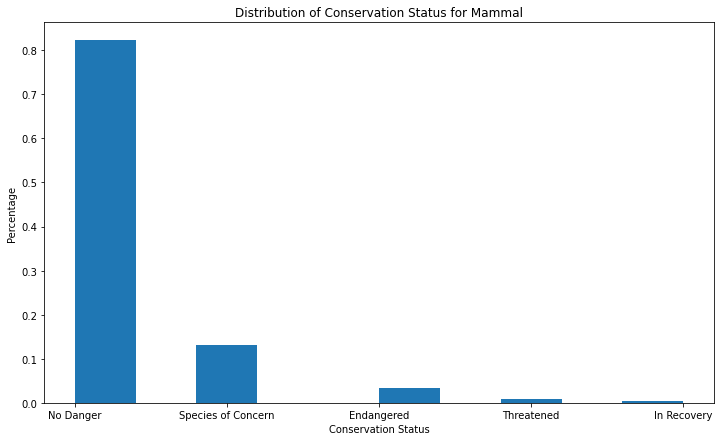

<Figure size 432x288 with 0 Axes>

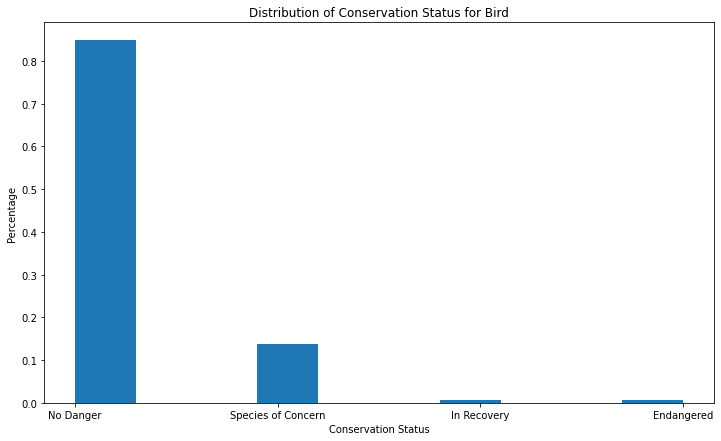

<Figure size 432x288 with 0 Axes>

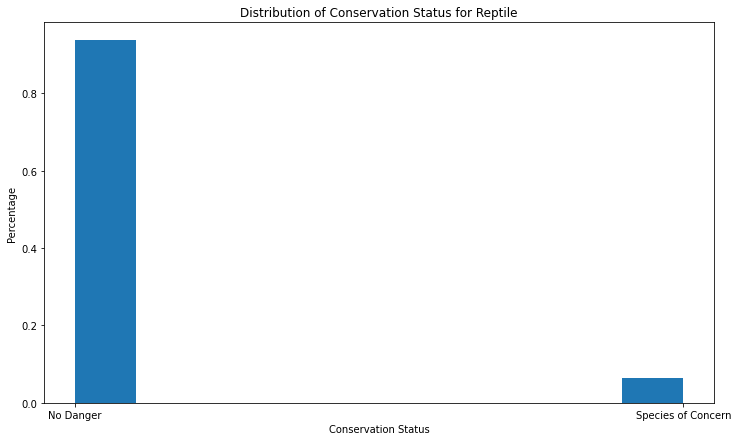

<Figure size 432x288 with 0 Axes>

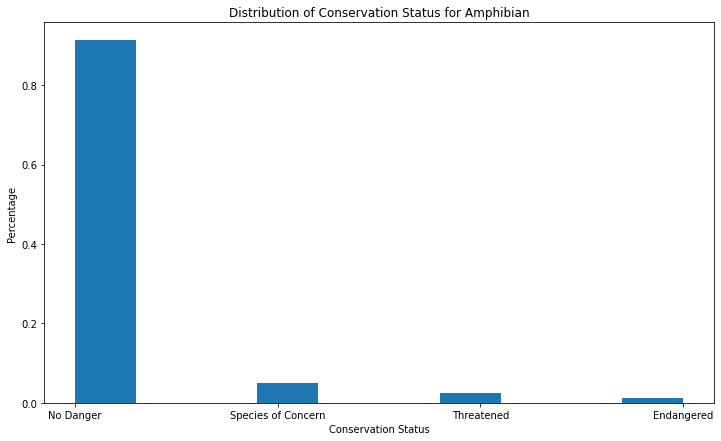

<Figure size 432x288 with 0 Axes>

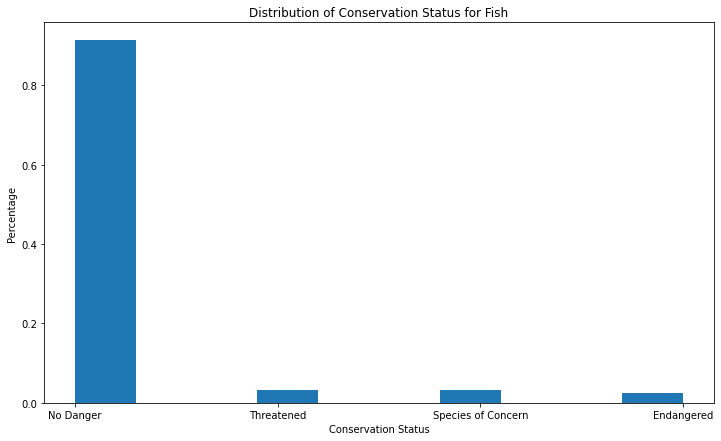

<Figure size 432x288 with 0 Axes>

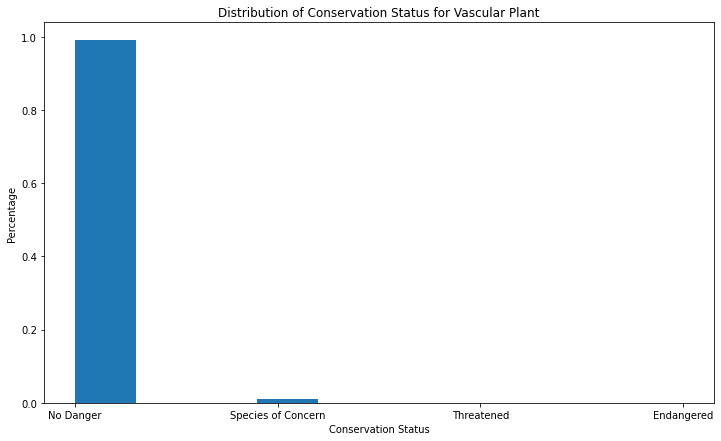

<Figure size 432x288 with 0 Axes>

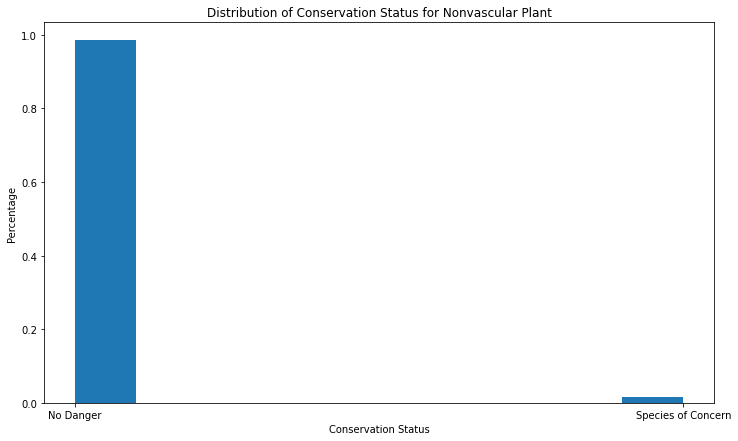

<Figure size 432x288 with 0 Axes>

In [19]:
concern_pct_dict = {}
threatened_pct_dict = {}
endagered_pct_dict = {}

for specie in df_species.category.unique():
    df_new = df_species[df_species['category']==specie]
    plt.figure(figsize = (12,7))
    plt.hist(df_new.conservation_status, weights=np.ones(len(df_new.conservation_status)) / len(df_new.conservation_status), density=False)
    plt.title('Distribution of Conservation Status for {}'.format(specie))
    plt.ylabel('Percentage')
    plt.xlabel('Conservation Status')
    plt.show()
    plt.clf()
    concern_pct_dict[specie] = len(df_new[df_new.conservation_status=='Species of Concern'])
    threatened_pct_dict[specie] = len(df_new[df_new.conservation_status=='Threatened'])
    endagered_pct_dict[specie] = len(df_new[df_new.conservation_status=='Endangered'])

Here we have used a histogram to see the distribution of the conservation status for each specie. 

Since we have seen earlier that the number of observations varied widly between species, in order to get a better visualization and be able to compare the endangerement for each species, we have made all of the bars for each histogram add up to 1. Therefore we can see the endangerement of species proportionally to the number of observations and compare each species fairly.

## Are certain types of species more likely to be endangered?


From the histograms of the previous questions it is clear that mamals are by far the most endagered. We will see this in more details in this section.

In [20]:
print("Count of species of concern.")
concern_pct_dict

Count of species of concern.


{'Mammal': 28,
 'Bird': 72,
 'Reptile': 5,
 'Amphibian': 4,
 'Fish': 4,
 'Vascular Plant': 43,
 'Nonvascular Plant': 5}

In [21]:
print("Count of species threateaned.")
threatened_pct_dict

Count of species threateaned.


{'Mammal': 2,
 'Bird': 0,
 'Reptile': 0,
 'Amphibian': 2,
 'Fish': 4,
 'Vascular Plant': 2,
 'Nonvascular Plant': 0}

In [22]:
print("Count of species endagered.")
endagered_pct_dict

Count of species endagered.


{'Mammal': 7,
 'Bird': 4,
 'Reptile': 0,
 'Amphibian': 1,
 'Fish': 3,
 'Vascular Plant': 1,
 'Nonvascular Plant': 0}

From the 3 dictionaries above we get the exact counts on the number of species that are endangered, threateaned or of concern. However, to see this more clearly, we should make a table and see the proportions for each specie.

In [23]:
df_species['is_at_risk'] = (df_species.conservation_status != 'No Danger') & (df_species.conservation_status != 'In Recovery')

In [24]:
df_species

,category,scientific_name,common_names,conservation_status,is_at_risk
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Danger,False
1,Mammal,Bos bison,"American Bison, Bison",No Danger,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Danger,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Danger,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Danger,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Danger,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Danger,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Danger,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Danger,False


In [25]:
categories = df_species.groupby(['category', 'is_at_risk']).scientific_name.nunique().reset_index().pivot(columns='is_at_risk', index='category', values='scientific_name') .reset_index()
categories.columns = ['category', 'not_at_risk', 'at_risk']
categories['Pct_at_risk'] = categories['at_risk'] / (categories['not_at_risk'] + categories['at_risk'])

categories

,category,not_at_risk,at_risk,Pct_at_risk
0,Amphibian,72,7,0.088608
1,Bird,416,72,0.147541
2,Fish,115,11,0.087302
3,Mammal,147,30,0.169492
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


From this table here we can see that `Mamals` and `Birds` are by far the most most likely to be endangered, while `Nonvascular Plant` and `Vascular Plant` are by far the safest.

## Are the differences between species and their conservation status significant?

First off, we will need to choose a **p-value** of 0.01 so that we are 99% confident that the differences between species and their conservation status are significant.

In [26]:
contingency1 = [[30, 147],[46, 4216]]
chi2, pval, dof, expected = chi2_contingency(contingency1)

Here we make the frequency table between the `Mammals` and `Vascular Plant`.

In [27]:
chi2

244.9989780340756

In [28]:
pval

3.1970608721524438e-55

Here we have used the Chi-square statistic to find that the **p-value** is under our 0.01 threshold, therefore the differences between species and their conservation status is significant.

In [29]:
contingency2 = [[72, 416],[5, 328]]
chi2, pval, dof, expected = chi2_contingency(contingency2)

Here we make the frequency table between the `Bird` and `Nonvascular Plant`.

In [30]:
chi2

39.35767491275696

In [31]:
pval

3.528631926993417e-10

Here we have used the Chi-square statistic to find that the **p-value** is under our 0.01 threshold, therefore the differences between species and their conservation status is significant.

In [32]:
contingency3 = [[30, 147],[5, 73]]
chi2, pval, dof, expected = chi2_contingency(contingency3)

Here we make the frequency table between the `Mammals` and `Reptile	`.

In [33]:
chi2

4.227179070929071

In [34]:
pval

0.03978150659000946

Here we have used the Chi-square statistic to find that the **p-value** is under over 0.01 threshold, therefore the differences between species and their conservation status is **NOT** significant.

Here we have used the Chi-square statistic to see if the differences between species and their conservation status are significant.

## Which species has been observed the most is their distribution amongst parks?

In [35]:
total_obervations = 0

for lifeform in df_observations.scientific_name.unique():
    df_new = df_observations[df_observations.scientific_name == lifeform]
    if total_obervations < np.sum(df_new.observations):
        total_obervations = np.sum(df_new.observations)
        most_observed = lifeform

In [36]:
print('The most oberved species across all national parks is {} with a total of {} observations.'.format(most_observed, total_obervations))

The most oberved species across all national parks is Streptopelia decaocto with a total of 1785 observations.


Here we have found out which species has been observed the most amongst all parks using the `df_obervations` dataframe.

In [37]:
df_new = df_observations[df_observations.scientific_name == 'Streptopelia decaocto']
df_new

,scientific_name,park_name,observations
1635,Streptopelia decaocto,Yellowstone National Park,255
3200,Streptopelia decaocto,Bryce National Park,92
3376,Streptopelia decaocto,Yosemite National Park,124
4515,Streptopelia decaocto,Bryce National Park,88
7057,Streptopelia decaocto,Great Smoky Mountains National Park,74
8072,Streptopelia decaocto,Bryce National Park,121
8710,Streptopelia decaocto,Yellowstone National Park,255
10107,Streptopelia decaocto,Great Smoky Mountains National Park,72
10643,Streptopelia decaocto,Yellowstone National Park,261
14699,Streptopelia decaocto,Great Smoky Mountains National Park,110


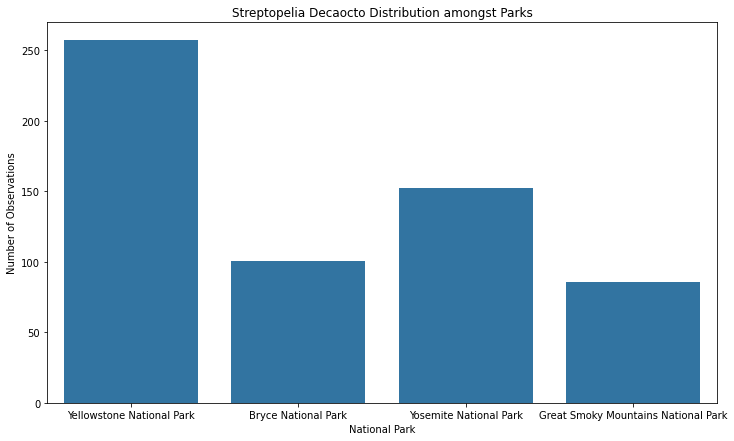

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize = (12,7))
sns.barplot(x = 'park_name', y = 'observations', data = df_new, errorbar=('ci', 0))
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.title('Streptopelia Decaocto Distribution amongst Parks')
plt.show()
plt.clf()

Here we have plotted a barplot of the distributions of observations of Streptopelia decaocto (our most observed species) amongst national parks. 

## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 